# Tensorflow/Keras Classification

In [36]:
import tensorflow as tf
import csv
import random
from sklearn.feature_extraction import text

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
# List of stop-words from sci-kit learn
stopwords = list(text.ENGLISH_STOP_WORDS)

In [33]:
# Opening data 
data = []

with open('data/all_post.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        row_data = []
        row_data.append(row[2])
        title = row[1]
        for word in stopwords:
            token = " " + word + " "
            title = title.replace(token, ' ')
        row_data.append(title)
        data.append(row_data)

In [221]:
# Neural Net Parameters
vocab_size = 1000
embedding_dim = 16
max_length = 50
padding_type = 'post'
oov_tok = '<OOV>'
training_proportion = .8

In [222]:
# Shuffling the data and assigning index to split on
random.shuffle(data)
split = int(training_proportion * len(data))
split

16000

In [223]:
# Creating X and Y
posts = []
labels = []
for item in data:
    posts.append(item[1])
    labels.append(item[0])

In [224]:
# Testing and Validation split
train_posts = posts[:split]
train_labels = labels[:split]
validation_posts = posts[split:]
validation_labels = labels[split:]

print(len(train_posts))
print(len(validation_posts))
print(len(train_labels))
print(len(validation_labels))

16000
4000
16000
4000


In [225]:
# Instantiating tokenizer, sequencing and padding posts
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
train_sequences = tokenizer.fit_on_texts(train_posts)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_posts)
train_padded = pad_sequences(train_sequences, 
                             maxlen=max_length,
                             padding=padding_type)

validation_sequences = tokenizer.texts_to_sequences(validation_posts)
validation_padded = pad_sequences(validation_sequences,
                                  maxlen=max_length,
                                  padding=padding_type)

In [226]:
# Formatting labels as numpy arrays for tensorflow input
import numpy as np
train_labels = np.array(train_labels).astype(int)
validation_labels = np.array(validation_labels).astype(int)

In [231]:
# Instantiating the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(24, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Custom ADAM optimizer
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

# Compiling the model
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 50, 16)            16000     
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 48, 24)            1176      
_________________________________________________________________
global_average_pooling1d_28  (None, 24)                0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 16)                400       
_________________________________________________________________
dropout_46 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 1)               

In [232]:
# Training
epochs = 15
history = model.fit(train_padded, train_labels,
                    validation_data = (validation_padded, validation_labels),
                    epochs = epochs,
                    verbose=2)

Epoch 1/15
500/500 - 1s - loss: 0.5752 - acc: 0.6908 - val_loss: 0.4232 - val_acc: 0.8090
Epoch 2/15
500/500 - 1s - loss: 0.3977 - acc: 0.8242 - val_loss: 0.3880 - val_acc: 0.8170
Epoch 3/15
500/500 - 1s - loss: 0.3688 - acc: 0.8380 - val_loss: 0.3849 - val_acc: 0.8207
Epoch 4/15
500/500 - 1s - loss: 0.3595 - acc: 0.8451 - val_loss: 0.3815 - val_acc: 0.8260
Epoch 5/15
500/500 - 1s - loss: 0.3508 - acc: 0.8451 - val_loss: 0.3801 - val_acc: 0.8278
Epoch 6/15
500/500 - 1s - loss: 0.3450 - acc: 0.8517 - val_loss: 0.3787 - val_acc: 0.8295
Epoch 7/15
500/500 - 1s - loss: 0.3404 - acc: 0.8534 - val_loss: 0.3812 - val_acc: 0.8298
Epoch 8/15
500/500 - 1s - loss: 0.3357 - acc: 0.8541 - val_loss: 0.3827 - val_acc: 0.8278
Epoch 9/15
500/500 - 1s - loss: 0.3303 - acc: 0.8579 - val_loss: 0.3821 - val_acc: 0.8255
Epoch 10/15
500/500 - 1s - loss: 0.3238 - acc: 0.8614 - val_loss: 0.3813 - val_acc: 0.8245
Epoch 11/15
500/500 - 0s - loss: 0.3176 - acc: 0.8648 - val_loss: 0.3824 - val_acc: 0.8213
Epoch 12

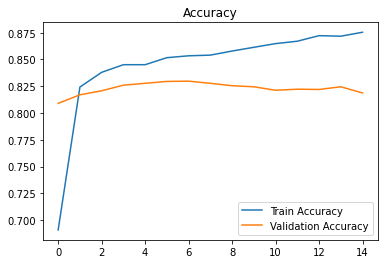

In [233]:
# Plotting Accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy');

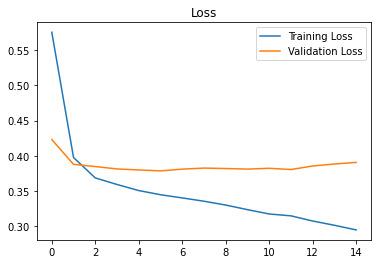

In [235]:
# Plotting Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss');